In [9]:
import cv2
import time
import numpy as np
from robomaster import robot
from robomaster import camera, blaster
import matplotlib.pyplot as plt

In [8]:
if __name__ == '__main__':
    ep_robot = robot.Robot()
    ep_robot.initialize(conn_type="ap")
    ep_gimbal = ep_robot.gimbal
    ep_camera = ep_robot.camera

    # Start video stream with 720P resolution
    ep_camera.start_video_stream(display=False, resolution=camera.STREAM_720P)
    ep_gimbal.recenter(pitch_speed=100, yaw_speed=100).wait_for_completed()
    # Allow some time for the stream to start
    time.sleep(2)

    # Capture an image from the video stream
    img = ep_camera.read_cv2_image(strategy="newest")

    # Save the captured image to a file
    if img is not None:
        cv2.imwrite("clear_acrylic.jpg", img)
        print("Image captured and saved as 'captured_image.jpg'.")
    else:
        print("Failed to capture image.")

    # Stop the video stream
    ep_camera.stop_video_stream()

    # Close the robot connection
    ep_robot.close()

Image captured and saved as 'captured_image.jpg'.


In [8]:
# if __name__ == '__main__':
#     ep_robot = robot.Robot()
#     ep_robot.initialize(conn_type="ap")

#     ep_camera = ep_robot.camera

#     # Start video stream with 720P resolution
#     ep_camera.start_video_stream(display=False, resolution=camera.STREAM_720P)
    
#     # Allow some time for the stream to start
#     time.sleep(2)

#     # Capture an image from the video stream
#     img = ep_camera.read_cv2_image(strategy="newest")

#     # Check if an image was captured
#     if img is not None:
#         # Get the dimensions of the image
#         height, width, _ = img.shape

#         # Calculate the center of the image
#         center_x = width // 2
#         center_y = height // 2

#         # Draw horizontal and vertical lines to form a crosshair
#         color = (0, 255, 0)  # Green color for the crosshair
#         thickness = 1  # Line thickness

#         # Draw vertical line (from top to bottom of the image)
#         cv2.line(img, (center_x, 0), (center_x, height), color, thickness)

#         # Draw horizontal line (from left to right of the image)
#         cv2.line(img, (0, center_y), (width, center_y), color, thickness)

#         # Save the image with the crosshair
#         cv2.imwrite("coca_cm_crosshair.jpg", img)
#         print("Image captured and saved as 'coca_cm_crosshair.jpg'.")
#     else:
#         print("Failed to capture image.")

#     # Stop the video stream
#     ep_camera.stop_video_stream()

#     # Close the robot connection
#     ep_robot.close()


Image captured and saved as 'coca_cm_crosshair.jpg'.


In [15]:
if __name__ == '__main__':
    ep_robot = robot.Robot()
    ep_robot.initialize(conn_type="ap")
    ep_camera = ep_robot.camera
    ep_gimbal = ep_robot.gimbal
    ep_blaster = ep_robot.blaster
    # Start video stream with 720P resolution
    ep_camera.start_video_stream(display=False, resolution=camera.STREAM_720P)
    ep_gimbal.recenter(pitch_speed=100, yaw_speed=100).wait_for_completed()
    ep_blaster.set_led(brightness=64, effect=blaster.LED_ON)
    time.sleep(1)
    # Allow some time for the stream to start
    time.sleep(2)

    print("Press 'c' to capture an image, or 'q' to quit.")

    while True:
        # Capture an image from the video stream
        img = ep_camera.read_cv2_image(strategy="newest")

        # Check if an image was captured
        if img is not None:
            # Get the dimensions of the image
            height, width, _ = img.shape

            # Calculate the center of the image
            center_x = width // 2
            center_y = height // 2

            # Draw horizontal and vertical lines to form a crosshair
            color = (0, 255, 0)  # Green color for the crosshair
            thickness = 2  # Line thickness

            # Draw vertical line (from top to bottom of the image)
            cv2.line(img, (center_x, 0), (center_x, height), color, thickness)

            # Draw horizontal line (from left to right of the image)
            cv2.line(img, (0, center_y), (width, center_y), color, thickness)

            # Display the image in a window
            cv2.imshow("Robot Camera Feed", img)

        # Wait for a key press
        key = cv2.waitKey(1) & 0xFF

        if key == ord('c'):
            # Save the image with the crosshair when 'c' is pressed
            cv2.imwrite("clear.jpg", img)
            print("Image captured and saved as 'coca_cm_crosshair.jpg'.")
        elif key == ord('q'):
            # Quit the loop if 'q' is pressed
            print("Exiting...")
            break

    # Stop the video stream
    ep_camera.stop_video_stream()
    ep_blaster.set_led(brightness=0, effect=blaster.LED_OFF)

    # Close the OpenCV window
    cv2.destroyAllWindows()

    # Close the robot connection
    ep_robot.close()


Press 'c' to capture an image, or 'q' to quit.
Exiting...


In [68]:
img = cv2.imread(f".\captured_image.jpg")  # อ่านภาพจากไฟล์ที่ระบุและเก็บไว้ในตัวแปร 'img'

In [ ]:
#B. Show the original image from A. and print the size of the image.

In [69]:
# Check if the image was loaded successfully
if img is not None:
    # Print the size of the image
    height, width, channels = img.shape
    print(f"Image size: Width = {width} pixels, Height = {height} pixels, Channels = {channels}")
else:
    print("Failed to load image.")

Image size: Width = 1280 pixels, Height = 720 pixels, Channels = 3


In [4]:
#C. Convert the original RGB image to HSL color space image. Show the L-channel image.

In [70]:
# Check if the image was loaded successfully
if img is not None:
        # Convert the image from BGR to HLS color space
        hls_image = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

        # Extract the L-channel (lightness) from the HLS image
        l_channel = hls_image[:, :, 1]  # In HLS, L (lightness) is the second channel (index 1)

        # Display the L-channel image
        cv2.imwrite("l_chanel_image.jpg", l_channel)
        cv2.imshow("L-Channel Image", l_channel)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
else:
        print("Failed to load image. Check if the file is a valid image format.")

In [ ]:
#D. Convert the original RGB image to HSL color space image. Plot the histogram of L-channel image.

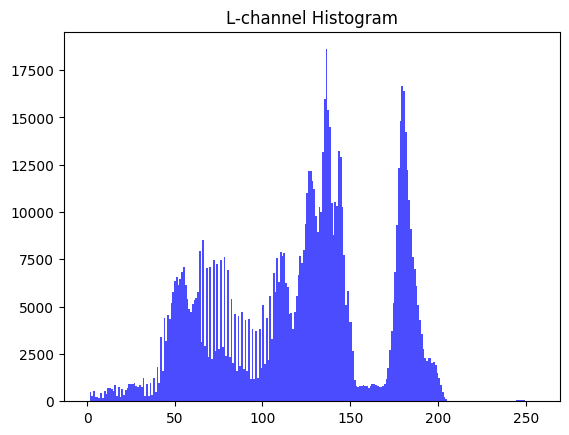

In [130]:
if img is not None:
        # Convert the image from BGR to HLS color space
    hls_image = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

        # Extract the L-channel (lightness) from the HLS image
    l_channel = cv2.calcHist([hls_image], [1], None, [256], [0, 256])  # In HLS, L (lightness) is the second channel (index 1)

    bins = np.linspace(0, 256, 256)
    
    plt.title('L-channel Histogram')
    plt.bar(bins, l_channel.ravel(), width=1, color='blue', alpha=0.7)

else:
    print("Failed to load image. Check if the file is a valid image format.")

In [ ]:
#E. Convert the original image to HSL color space. Rescale the L-channel image from to the pixel value range [-1, 1].

In [134]:
img_l = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

# Extract the L channel
l_channel = img_l[:, :, 1]

# Rescale L channel to range -1 to 1
rescale = (l_channel / 127.5) - 1
# Display the rescaled image
cv2.imshow('rescale', rescale)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#F. Plot the histogram of rescaled L-channel image.

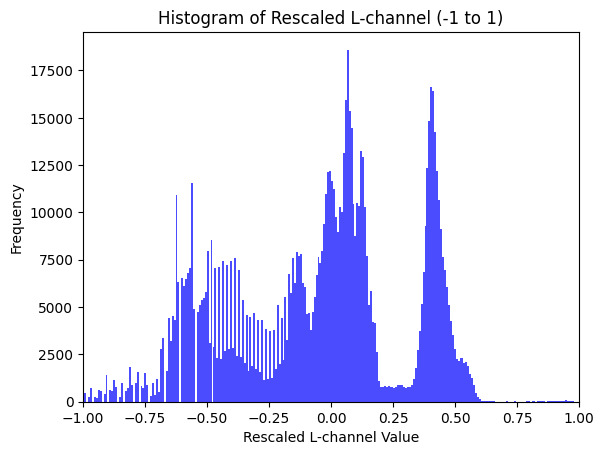

In [132]:
# Convert the image from RGB to HLS color space
img_l = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

# Extract the L-channel (Lightness)
l_channel = img_l[:,:,1]

# Rescale the L-channel to the range [-1, 1]
rescale = (l_channel / 127.5) - 1

# Convert the rescaled L-channel to uint8 format (0 to 255)
l_channel_uint8 = np.uint8(((rescale + 1) * 127.5))

# Calculate the histogram using cv2.calcHist
hist = cv2.calcHist([l_channel_uint8], [0], None, [256], [0, 256])

# Create an array for the x-axis (pixel value range from -1 to 1)
bins = np.linspace(-1, 1, 256)

# Plot the histogram
plt.title('Histogram of Rescaled L-channel (-1 to 1)')
plt.bar(bins, hist.flatten(), width=2/256, color='blue', alpha=0.7)
plt.xlabel('Rescaled L-channel Value')
plt.ylabel('Frequency')
plt.xlim(-1, 1)
plt.show()


In [ ]:
#G. Create a random noise image with equal size of original image. Random with normal distribution (zero mean, unit variance). Show the noise image.

In [133]:
height, width, channels = img.shape

# Generate random noise with normal distribution (mean=0, variance=1)
noise_image = np.random.normal(0, 1, (height, width, channels))

# Scale the noise image to 0-255 and convert to uint8
noise_image = np.clip((noise_image * 255), 0, 255).astype(np.uint8)

# Save the noise image to a file
cv2.imwrite("noise_image.jpg", noise_image)

# Display the noise image
cv2.imshow('noise', noise_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
#H. Combine the noise image with rescaled L-channel image. Show the results image.

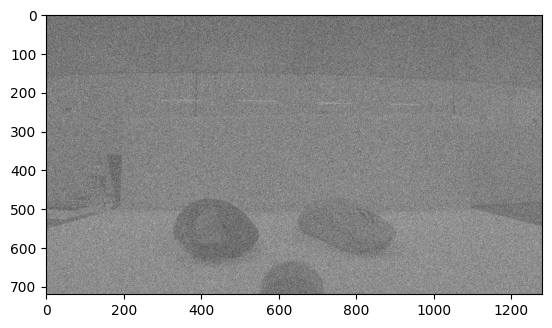

In [122]:
img_l = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
l_channel = img_l[:,:,1]
rescale = (l_channel / 127.5) - 1
noise_image = np.random.normal(0, 1, l_channel.shape)

combine = rescale + noise_image
cv2.imshow('combine',combine)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(combine, cmap='gray')

In [ ]:
#I. Rescale L-channel image back to original pixel value [0, 255]. Convert back to RGB color-space image. Show the result image.

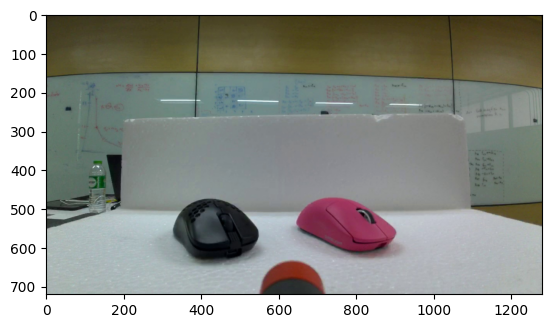

In [125]:
img_l = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
l_channel = img_l[:,:,1]
rescale = (l_channel / 127.5) - 1
rescale_back = (rescale + 1) * 127.5

hls_image[:, :, 1] = rescale_back
res_rgb = cv2.cvtColor(hls_image, cv2.COLOR_HLS2RGB)
cv2.imwrite("Rescaled_back.jpg", res_rgb)
plt.imshow(cv2.cvtColor(res_rgb, cv2.COLOR_BGR2RGB))
cv2.imshow('Rescaled back',res_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#J. (Bonus) Apply the Box blur filter with kernel size = 6 to the L-channel image in I. Then repeat step J. show the result image.

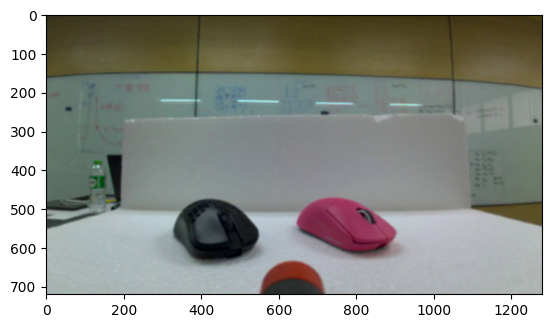

In [121]:
kernel = np.ones((6, 6), np.float32) / 36
blur_rescale = cv2.filter2D(rescale, -1, kernel)

rescale_blur = (blur_rescale + 1) * 127.5
rescale_blur = np.clip(rescale_blur, 0, 255).astype(np.uint8)

hls_image[:, :, 1] = rescale_blur

rgb_blur = cv2.cvtColor(hls_image, cv2.COLOR_HLS2RGB)

cv2.imwrite("blurred.jpg", rgb_blur)
plt.imshow(cv2.cvtColor(rgb_blur, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imshow('Blurred', rgb_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()
